# Data Analysis for Premier Leauge season 23/24 

English Premier League Matches 2023/2024 Season

About Dataset English Premier League matches from 2023/2024 season.

**************Data is scraped from https://fbref.com/en/ Unnamed: 0: An index or identifier column.************

Date: The date when the match took place.

Time: The kickoff time of the match. 

Comp: The competition name, which is the Premier League for the rows displayed.

Round: The matchweek or round of the competition.

Day: The day of the week the match was played. 

Venue: Indicates whether the team was playing at ho.

Result: The outcome of the match from the perspective of the team mentioned at the end (W = Win, D = Draw, L = Loss). 

GF (Goals For): The number of goals scored by the team.

GA (Goals Against): The number of goals conceded by the team.
Opponent: The name of the opposing team. 

xG: Expected goals for the team. 

xGA: Expected goals against the team.

Poss: Possession percentage during the match.

Attendance: The number of spectators present at the venue.

Captain: The name of the team captain.

Formation: The team's formation.

Referee: The name of the match referee. 

Match Report: A link or reference to a detailed match report.

Notes: Any additional notes about the match. 

Sh (Shots): Total number of shots taken by the team. 

SoT (Shots on Target): Number of shots on target. 

Dist: Average distance (likely in meters) from which shots were taken.

FK: Number of free kicks taken. PK (Penalty Kicks): Number of penalty kicks scored.

PKatt (Penalty Kicks Attempted): Number of penalty kicks attempted. 

Season: The season year.

Team: The team the data row is about.

                                                                                     

# Questions


How are expected goals (XG) and actual goals related for each team?
                                                    
Does the kickoff time influence the number of goals and the results for any team?

How does possession affect a team's results?

What other insights can be derived from the analysis?





In [143]:
#Importing required libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#loading dataset 
prem_df = pd.read_csv(r'matches.csv')

# Expolatory Data Analysis with Python Libraries

In [51]:
prem_df.shape


(760, 28)

In [52]:
prem_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [53]:
prem_df.head(5)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity


In [54]:
#Checking any null values
prem_df.isna().sum()

Unnamed: 0        0
Date              0
Time              0
Comp              0
Round             0
Day               0
Venue             0
Result            0
GF                0
GA                0
Opponent          0
xG                0
xGA               0
Poss              0
Attendance        0
Captain           0
Formation         0
Referee           0
Match Report      0
Notes           760
Sh                0
SoT               0
Dist              0
FK                0
PK                0
PKatt             0
Season            0
Team              0
dtype: int64

In [55]:
#Checking any duplicated rows
prem_df.duplicated().sum()

0

In [56]:
# Split the string and convert the last part to integer
prem_df['Matchweek'] = prem_df['Round'].str.split().str[-1].astype(int)

In [57]:
prem_df.head(5)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Matchweek
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity,1
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity,2
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity,3
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity,4
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity,5


In [58]:
prem_df["Team"].unique()

array(['ManchesterCity', 'Arsenal', 'Liverpool', 'AstonVilla',
       'TottenhamHotspur', 'Chelsea', 'NewcastleUnited',
       'ManchesterUnited', 'WestHamUnited', 'CrystalPalace',
       'BrightonandHoveAlbion', 'Bournemouth', 'Fulham',
       'WolverhamptonWanderers', 'Everton', 'Brentford',
       'NottinghamForest', 'LutonTown', 'Burnley', 'SheffieldUnited'],
      dtype=object)

In [59]:
prem_df["Opponent"].unique()

array(['Burnley', 'Newcastle Utd', 'Sheffield Utd', 'Fulham', 'West Ham',
       "Nott'ham Forest", 'Wolves', 'Arsenal', 'Brighton',
       'Manchester Utd', 'Bournemouth', 'Chelsea', 'Liverpool',
       'Tottenham', 'Aston Villa', 'Luton Town', 'Crystal Palace',
       'Everton', 'Brentford', 'Manchester City'], dtype=object)

In [60]:

#Define the mapping dictionary
abbr_team = {
    'ManchesterCity': 'MCI',
    'Arsenal': 'ARS',
    'Liverpool': 'LIV',
    'AstonVilla': 'AVL',
    'TottenhamHotspur': 'TOT',
    'Chelsea': 'CHE',
    'NewcastleUnited': 'NEW',
    'ManchesterUnited': 'MUN',
    'WestHamUnited': 'WHU',
    'CrystalPalace': 'CRY',
    'BrightonandHoveAlbion': 'BHA',
    'Bournemouth': 'BOU',
    'Fulham': 'FUL',
    'WolverhamptonWanderers': 'WOL',
    'Everton': 'EVE',
    'Brentford': 'BRE',
    'NottinghamForest': 'NFO',
    'LutonTown': 'LUT',
    'Burnley': 'BUR',
    'SheffieldUnited': 'SHU'
}
abbr_opp = {
                 'Burnley':'BUR',
                 'Newcastle Utd':'NEW',
                 'Sheffield Utd':'SHU',
                 'Fulham':'FUL',
                 'West Ham':'WHU',
                 "Nott'ham Forest":'NFO',
                 'Wolves':'WOL',
                 'Arsenal':'ARS',
                 'Brighton':'BHA',
                 'Manchester Utd':'MUN',
                 'Bournemouth':'BOU',
                 'Chelsea':'CHE',
                 'Liverpool':'LIV',
                 'Tottenham':'TOT',
                 'Aston Villa':'AVL', 
                 'Luton Town':'LUT',
                 'Crystal Palace':'CRY',
                 'Everton':'EVE',
                 'Brentford':'BRE',
                 'Manchester City':'MCI'
                }


In [61]:
#Map the abbreviations for 'Opponent'
prem_df['Opponent_Abbr'] = prem_df['Opponent'].map(abbr_opp).fillna('UNKNOWN')

#Replace the 'Opponent' column with 'Opponent_Abbr'
prem_df['Opponent'] = prem_df['Opponent_Abbr']

#Drop the 'Opponent_abbr" column
prem_df.drop(columns='Opponent_Abbr',inplace = True)

In [62]:
prem_df.head(10)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Matchweek
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity,1
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity,2
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity,3
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity,4
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity,5
5,8,2023-09-23,15:00,Premier League,Matchweek 6,Sat,Home,W,2,0,...,NaN,7.0,4.0,17.2,2.0,0,0,2024,ManchesterCity,6
6,10,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,L,1,2,...,NaN,23.0,8.0,19.3,1.0,0,0,2024,ManchesterCity,7
7,12,2023-10-08,16:30,Premier League,Matchweek 8,Sun,Away,L,0,1,...,NaN,4.0,0.0,14.9,0.0,0,0,2024,ManchesterCity,8
8,13,2023-10-21,15:00,Premier League,Matchweek 9,Sat,Home,W,2,1,...,NaN,10.0,5.0,18.8,1.0,0,0,2024,ManchesterCity,9
9,15,2023-10-29,15:30,Premier League,Matchweek 10,Sun,Away,W,3,0,...,NaN,20.0,9.0,17.2,2.0,1,1,2024,ManchesterCity,10


In [63]:
prem_df['Opponent'].unique()

array(['BUR', 'NEW', 'SHU', 'FUL', 'WHU', 'NFO', 'WOL', 'ARS', 'BHA',
       'MUN', 'BOU', 'CHE', 'LIV', 'TOT', 'AVL', 'LUT', 'CRY', 'EVE',
       'BRE', 'MCI'], dtype=object)

In [64]:
#Map the abbreviations for 'Team'
prem_df['Team_Abbr'] = prem_df['Team'].map(abbr_team).fillna('UNKNOWN')

#Replace the 'Opponent' column with 'Opponent_Abbr'
prem_df['Team'] = prem_df['Team_Abbr']

#Drop the 'Opponent_abbr" column
prem_df.drop(columns='Team_Abbr',inplace = True)

In [65]:
prem_df['Team'].unique()

array(['MCI', 'ARS', 'LIV', 'AVL', 'TOT', 'CHE', 'NEW', 'MUN', 'WHU',
       'CRY', 'BHA', 'BOU', 'FUL', 'WOL', 'EVE', 'BRE', 'NFO', 'LUT',
       'BUR', 'SHU'], dtype=object)

In [66]:

#Apply the Concat function to each row which can be primary key in our table
prem_df['Match_ID'] = prem_df['Team'] +"_VS_"+ prem_df['Opponent']

In [67]:
prem_df.head(10)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Matchweek,Match_ID
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,17.0,8.0,13.9,0.0,0,0,2024,MCI,1,MCI_VS_BUR
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,14.0,4.0,17.9,0.0,0,0,2024,MCI,2,MCI_VS_NEW
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,29.0,9.0,17.3,2.0,0,1,2024,MCI,3,MCI_VS_SHU
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,6.0,4.0,14.8,0.0,1,1,2024,MCI,4,MCI_VS_FUL
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,29.0,13.0,16.4,1.0,0,0,2024,MCI,5,MCI_VS_WHU
5,8,2023-09-23,15:00,Premier League,Matchweek 6,Sat,Home,W,2,0,...,7.0,4.0,17.2,2.0,0,0,2024,MCI,6,MCI_VS_NFO
6,10,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,L,1,2,...,23.0,8.0,19.3,1.0,0,0,2024,MCI,7,MCI_VS_WOL
7,12,2023-10-08,16:30,Premier League,Matchweek 8,Sun,Away,L,0,1,...,4.0,0.0,14.9,0.0,0,0,2024,MCI,8,MCI_VS_ARS
8,13,2023-10-21,15:00,Premier League,Matchweek 9,Sat,Home,W,2,1,...,10.0,5.0,18.8,1.0,0,0,2024,MCI,9,MCI_VS_BHA
9,15,2023-10-29,15:30,Premier League,Matchweek 10,Sun,Away,W,3,0,...,20.0,9.0,17.2,2.0,1,1,2024,MCI,10,MCI_VS_MUN


In [68]:
prem_df["Team"].unique()

array(['MCI', 'ARS', 'LIV', 'AVL', 'TOT', 'CHE', 'NEW', 'MUN', 'WHU',
       'CRY', 'BHA', 'BOU', 'FUL', 'WOL', 'EVE', 'BRE', 'NFO', 'LUT',
       'BUR', 'SHU'], dtype=object)

In [69]:
prem_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team', 'Matchweek', 'Match_ID'],
      dtype='object')

In [91]:
prem_df['Result'].unique()

array(['W', 'L', 'D'], dtype=object)

In [107]:
#Mapping Points for each match
points = { 'W': 3 , 'L':0, 'D':1 }

prem_df['Points'] = prem_df['Result'].map(points).fillna('UNKNOWN')


In [117]:

#Selecting only columns which we are using for analysis.
prem_df = prem_df[['Match_ID','Team','Opponent','Matchweek','Venue','Date','Time','Day','Points','Result','GF','GA','xG','xGA','Poss','Sh',
'SoT','Dist','FK','PK','PKatt']]


In [119]:
prem_df.head(10)

,Match_ID,Team,Opponent,Matchweek,Venue,Date,Time,Day,Points,Result,...,GA,xG,xGA,Poss,Sh,SoT,Dist,FK,PK,PKatt
0,MCI_VS_BUR,MCI,BUR,1,Away,2023-08-11,20:00,Fri,3,W,...,0,1.9,0.3,65.0,17.0,8.0,13.9,0.0,0,0
1,MCI_VS_NEW,MCI,NEW,2,Home,2023-08-19,20:00,Sat,3,W,...,0,1.0,0.3,59.0,14.0,4.0,17.9,0.0,0,0
2,MCI_VS_SHU,MCI,SHU,3,Away,2023-08-27,14:00,Sun,3,W,...,1,3.5,0.7,79.0,29.0,9.0,17.3,2.0,0,1
3,MCI_VS_FUL,MCI,FUL,4,Home,2023-09-02,15:00,Sat,3,W,...,1,2.2,1.4,68.0,6.0,4.0,14.8,0.0,1,1
4,MCI_VS_WHU,MCI,WHU,5,Away,2023-09-16,15:00,Sat,3,W,...,1,3.6,0.9,68.0,29.0,13.0,16.4,1.0,0,0
5,MCI_VS_NFO,MCI,NFO,6,Home,2023-09-23,15:00,Sat,3,W,...,0,1.3,1.0,57.0,7.0,4.0,17.2,2.0,0,0
6,MCI_VS_WOL,MCI,WOL,7,Away,2023-09-30,15:00,Sat,0,L,...,2,0.9,0.4,68.0,23.0,8.0,19.3,1.0,0,0
7,MCI_VS_ARS,MCI,ARS,8,Away,2023-10-08,16:30,Sun,0,L,...,1,0.5,0.4,51.0,4.0,0.0,14.9,0.0,0,0
8,MCI_VS_BHA,MCI,BHA,9,Home,2023-10-21,15:00,Sat,3,W,...,1,0.8,0.8,55.0,10.0,5.0,18.8,1.0,0,0
9,MCI_VS_MUN,MCI,MUN,10,Away,2023-10-29,15:30,Sun,3,W,...,0,4.0,0.9,60.0,20.0,9.0,17.2,2.0,1,1


In [123]:
prem_df.sample(5)

,Match_ID,Team,Opponent,Matchweek,Venue,Date,Time,Day,Points,Result,...,GA,xG,xGA,Poss,Sh,SoT,Dist,FK,PK,PKatt
115,AVL_VS_EVE,AVL,EVE,2,Home,2023-08-20,14:00,Sun,3,W,...,0,2.9,0.6,60.0,12.0,6.0,18.5,0.0,1,1
220,CHE_VS_EVE,CHE,EVE,33,Home,2024-04-15,20:00,Mon,3,W,...,0,3.1,1.5,58.0,13.0,9.0,18.8,0.0,1,1
333,WHU_VS_NEW,WHU,NEW,30,Away,2024-03-30,12:30,Sat,0,L,...,4,1.4,4.1,40.0,10.0,4.0,14.1,0.0,0,0
499,WOL_VS_LUT,WOL,LUT,6,Away,2023-09-23,15:00,Sat,1,D,...,1,0.6,2.1,43.0,3.0,3.0,7.0,0.0,0,0
142,AVL_VS_WHU,AVL,WHU,29,Away,2024-03-17,14:00,Sun,1,D,...,1,0.7,2.0,69.0,13.0,5.0,20.6,0.0,0,0


In [81]:
prem_df.dtypes

Match_ID      object
Team          object
Opponent      object
Matchweek      int64
Venue         object
Date          object
Time          object
Day           object
Result        object
GF             int64
GA             int64
xG           float64
xGA          float64
Poss         float64
Sh           float64
SoT          float64
Dist         float64
FK           float64
PK             int64
PKatt          int64
dtype: object

In [127]:
#Changing datatype Date column to datetime
prem_df['Date'] = pd.to_datetime(prem_df['Date'])
prem_df.dtypes

Match_ID             object
Team                 object
Opponent             object
Matchweek             int64
Venue                object
Date         datetime64[ns]
Time                 object
Day                  object
Points                int64
Result               object
GF                    int64
GA                    int64
xG                  float64
xGA                 float64
Poss                float64
Sh                  float64
SoT                 float64
Dist                float64
FK                  float64
PK                    int64
PKatt                 int64
dtype: object

In [137]:
points_table = pd.pivot_table(prem_df, 
                              index = 'Team', 
                              values = 'Points', 
                              aggfunc = 'sum', 
                              fill_value = 0).sort_values('Points', ascending = False)
points_table

,Points
Team,
MCI,91
ARS,89
LIV,82
AVL,68
TOT,66
CHE,63
NEW,60
MUN,60
WHU,52


# Let's identify which teams have scored fewer goals than their expected goals.

In [163]:

df_xGs = prem_df.groupby('Team')[['xG','GF']].sum()

df_more_XG = df_xGs[df_xGs['xG'] > df_xGs['GF']]
df_more_XG

,xG,GF
Team,,
BHA,56.6,55
BOU,56.0,54
BRE,58.2,56
EVE,53.5,40
LIV,87.8,86
NFO,50.0,49
SHU,38.6,35


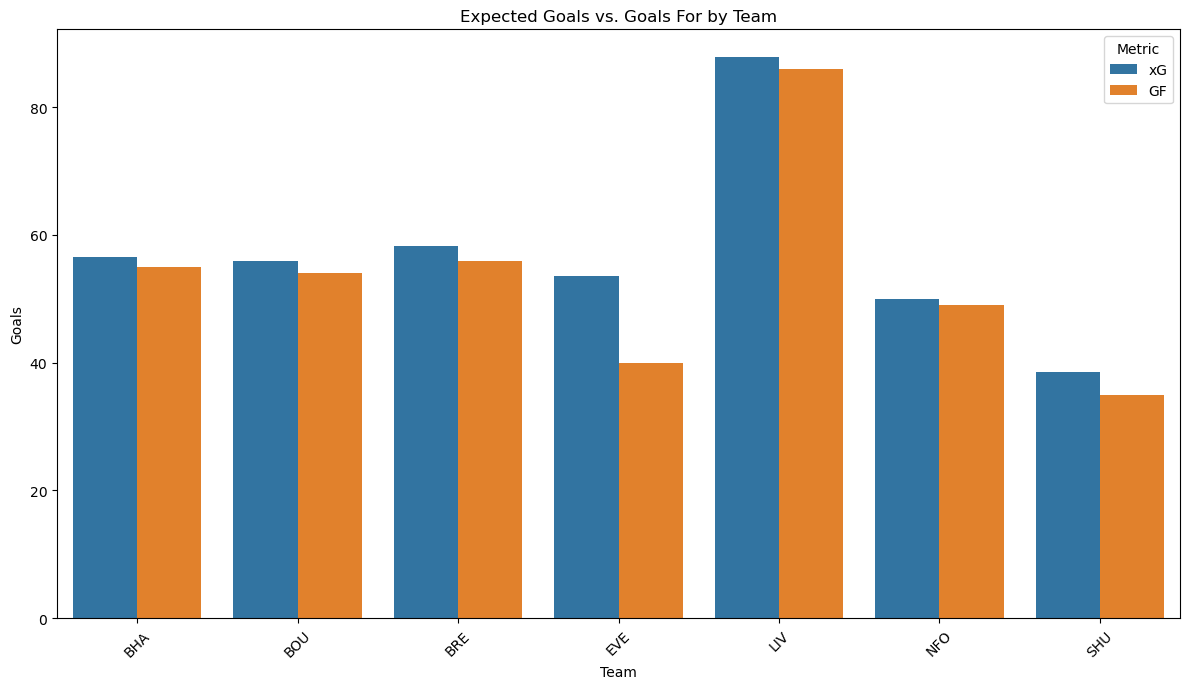

In [189]:
import seaborn as sns

# Melt the DataFrame
df_melted = df_more_XG.reset_index().melt(id_vars='Team', var_name='Metric', value_name='Value')

# Plot with Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(data=df_melted, x = 'Team', y = 'Value', hue='Metric')
# Adding labels and title
plt.xlabel('Team')
plt.ylabel('Goals')
plt.title('Expected Goals vs. Goals For by Team')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# Average Team Possession in the Season 23/24

In [205]:
#visualize some of average possession for each team.
ave_poss_df = prem_df.groupby('Team')['Poss'].mean().round(2).sort_values(ascending = False).reset_index()
ave_poss_df

,Team,Poss
0,MCI,65.21
1,TOT,61.58
2,LIV,61.26
3,BHA,59.84
4,CHE,58.61
5,ARS,58.18
6,AVL,53.11
7,NEW,52.21
8,FUL,50.61
9,MUN,50.58


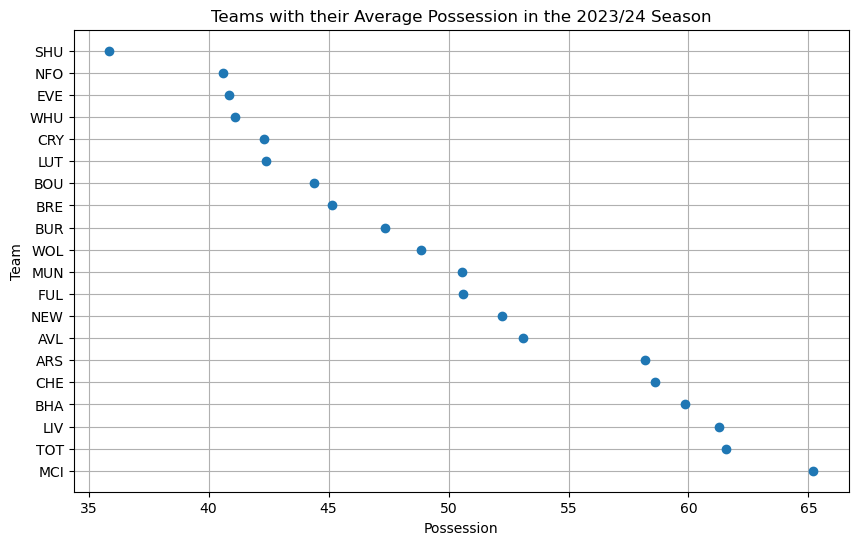

In [222]:
plt.figure(figsize = (10,6))
plt.plot(ave_poss_df['Poss'],ave_poss_df['Team'],'o', markersize = 6) 
plt.title('Teams with their Average Possession in the 2023/24 Season')
plt.xlabel('Possession')
plt.ylabel('Team')
plt.grid(True)
plt.show()